# Matplotilb
    
    -http://matplotlib.org
    -http://seaborn.pydata.org
    
## 기본 그래프
    
    선(line), 막대(bar), 히스토그램, 산포도(scatter), 상자(box)
   - 기초 통계학 4p 참고

1) 질적 데이터
    
    요약방법 : 도표
    정리방법 : 도수 분표표, 분할표
    그래프 : 막대그래프(도수), 원 그래프.... 소량의 데이터
 
2) 앙적 데이터
    
    요약방법 : 수치
    정리방법 : 산술평균, 중앙값, ....
    그래프 : 히스토그램,시계열 그래프,산포도(선정도),Boxplot 

In [1]:
import matplotlib as npl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import matplotlib.font_manager as fn
font_name=fn.FontProperties(fname="C:/WIndows/Fonts/malgun.ttf").get_name()  #한글 꺠짐 패치
plt.rc("font",family=font_name)

npl.rcParams["axes.unicode_minus"]=False

## 선 그래프

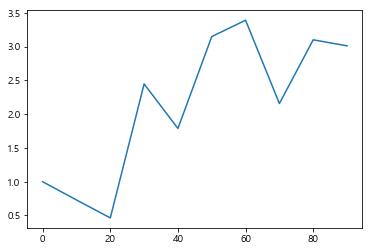

In [21]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10))
s.plot()

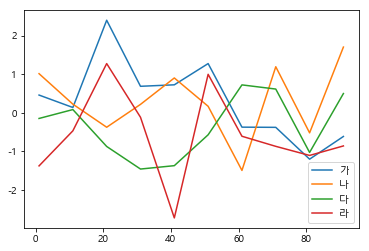

In [26]:
df1= pd.DataFrame(np.random.randn(10,4), columns=["가","나","다","라"],
                 index=np.arange(1,100,10))
df1.plot()

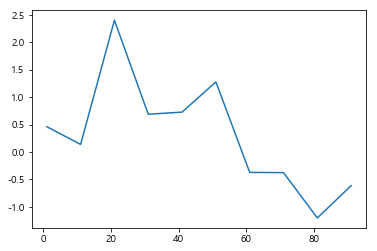

In [27]:
df1["가"].plot()

## 막대 그래프

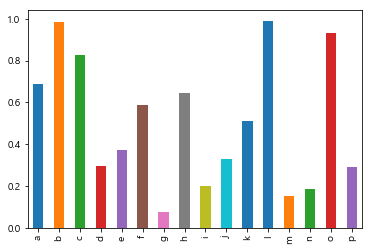

In [30]:
s2= pd.Series(np.random.rand(16),index=list("abcdefghijklmnop"))
s2
s2.plot(kind="bar")

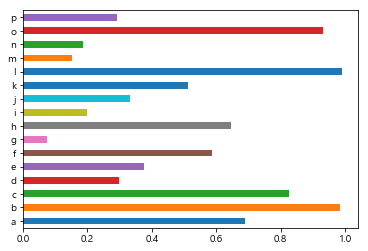

In [33]:
s2.plot.barh()
s2.plot(kind="barh")   #동일함

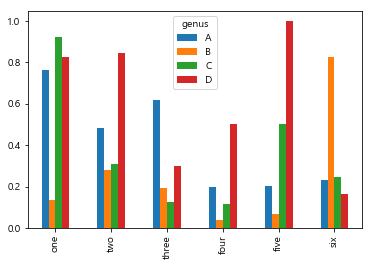

In [37]:
df2 = pd.DataFrame(np.random.rand(6,4), index=["one","two","three","four","five","six"], 
                   columns=pd.Index(['A','B','C','D'], name="genus"))

df2.plot.bar()

## 히스토그램
    
       -X변수가 가질 수 있는 값의 범위
       -값만 필요하고 인덱스는 필요없다.
       

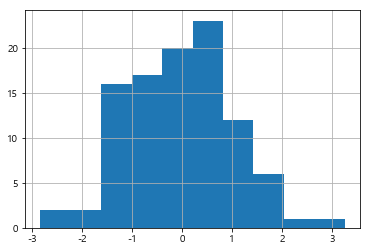

In [38]:
c3 = pd.Series(np.random.normal(0,1,size=100))
c3
c3.hist()

## 산포도(Scatter plot)

    - 두 데이터의 관계를 파악할수 있다
        - 양의 관계 x++ y++
        - 음의 관계 x++ y--

[[ 1.10958075 -5.67778061]
 [ 2.32744163 -0.37564232]
 [-0.14621811  4.09072484]
 [-0.75121164 -4.65506215]
 [ 2.83780893 -5.05059976]]


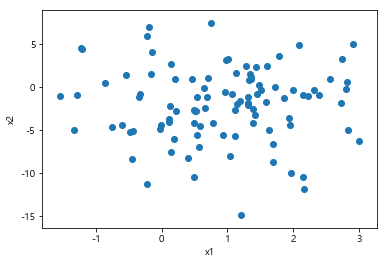

In [46]:
x1=np.random.normal(1,1, size=(100,1))
x2=np.random.normal(-2,4, size=(100,1))

x = np.concatenate((x1,x2),axis=1)
print(x[:5])

df3=pd.DataFrame(x,columns=["x1","x2"])
df3.head()

df3.plot.scatter("x1","x2")
plt.scatter(df3["x1"],df3["x2"])

# Matplotlib을 이용한 그래프 그리기

In [47]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0,0.5,'Total Bill')

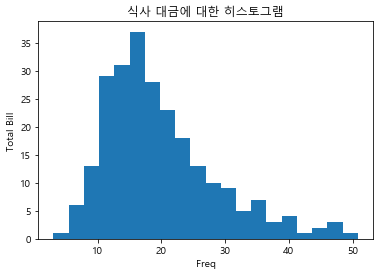

In [51]:
fig=plt.figure()
ar=fig.add_subplot(1,1,1)

ar.hist(tips["total_bill"],bins=20)
ar.set_title("식사 대금에 대한 히스토그램")
ar.set_xlabel("Freq")
ar.set_ylabel("Total Bill")

Text(0,0.5,'tips')

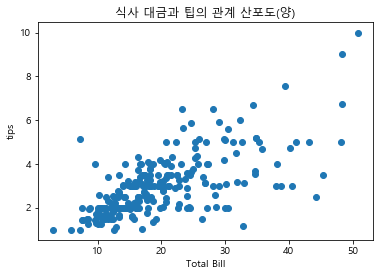

In [54]:
# Tips와 Total_bill의 관계를 알고 싶다

fig=plt.figure()
ar=fig.add_subplot(1,1,1)

ar.scatter(tips["total_bill"],tips["tip"])
ar.set_title("식사 대금과 팁의 관계 산포도(양)")
ar.set_xlabel("Total Bill")
ar.set_ylabel("tips")

In [104]:
tips = sns.load_dataset("tips")
def record_sex(sex):
    if sex == "Female":
        return 0
    else :
        return 1
tips["sex_color"]=tips["sex"].apply(record_sex)
tips.tail()

,total_bill,tip,sex,smoker,day,time,size,sex_color
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1
243,18.78,3.00,Female,No,Thur,Dinner,2,0


Text(0,0.5,'tips')

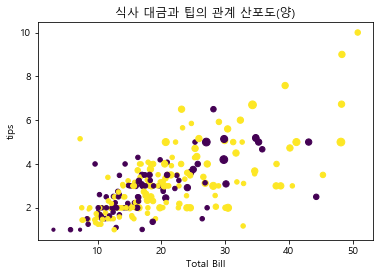

In [105]:
fig=plt.figure()
ar=fig.add_subplot(1,1,1)

ar.scatter(tips["total_bill"],tips["tip"],c=tips["sex_color"],s=tips["size"]*10)
ar.set_title("식사 대금과 팁의 관계 산포도(양)")
ar.set_xlabel("Total Bill")
ar.set_ylabel("tips")

Text(0,0.5,'Tip의 값')

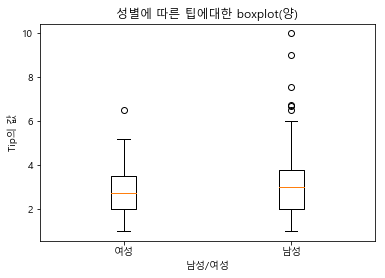

In [71]:
#성별 tip의 관계
fig=plt.figure()
ar=fig.add_subplot(1,1,1)

ar.boxplot([tips[tips["sex"]=='Female']['tip'],tips[tips["sex"]=='Male']['tip']],labels=["여성","남성"])
ar.set_title("성별에 따른 팁에대한 boxplot(양)")
ar.set_xlabel("남성/여성")
ar.set_ylabel("Tip의 값")

## Seaborn

In [96]:
tips=sns.load_dataset("tips")


C:\Users\kjjs1\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Total Bill')

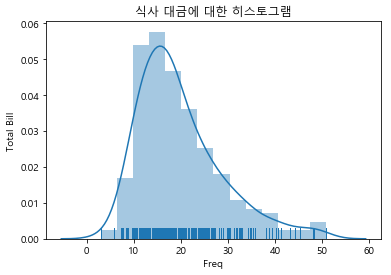

In [77]:
ar=plt.subplot()

ar=sns.distplot(tips["total_bill"],rug=True)
ar.set_title("식사 대금에 대한 히스토그램")
ar.set_xlabel("Freq")
ar.set_ylabel("Total Bill")

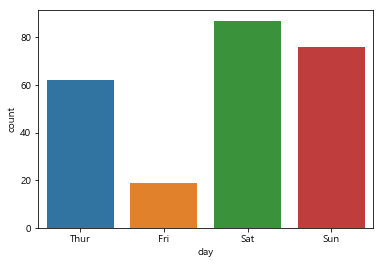

In [78]:
sns.countplot(tips['day'],data=tips)

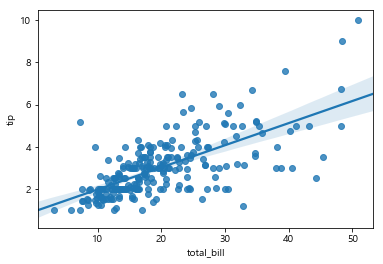

In [81]:
sns.regplot(x="total_bill",y="tip",data=tips)  #fit_reg 선 옵션

C:\Users\kjjs1\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\kjjs1\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


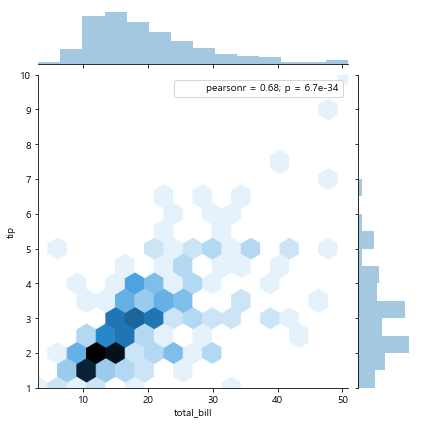

In [83]:
sns.jointplot(x="total_bill",y="tip",data=tips,kind='hex')

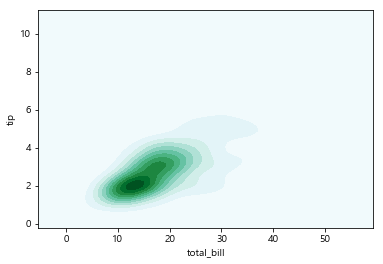

In [86]:
sns.kdeplot(data=tips["total_bill"],data2=tips["tip"],shade=True)

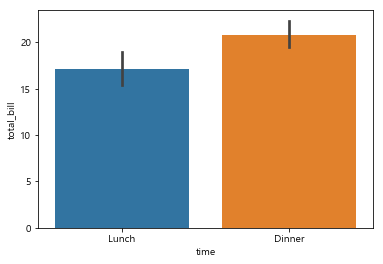

In [87]:
sns.barplot(x="time",y="total_bill",data=tips)

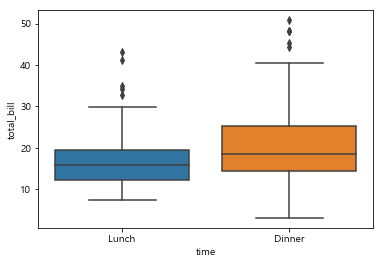

In [88]:
sns.boxplot(x="time",y="total_bill",data=tips)

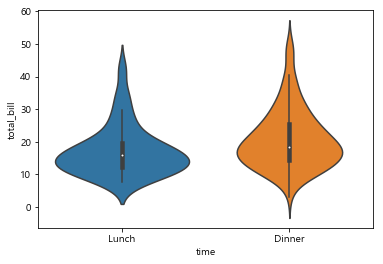

In [89]:
sns.violinplot(x="time",y="total_bill",data=tips)

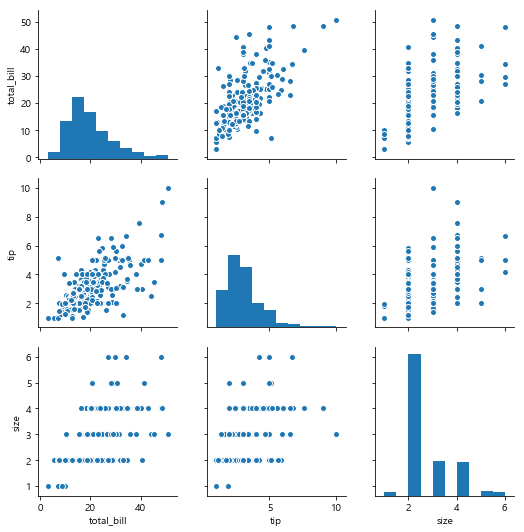

In [90]:
sns.pairplot(tips)

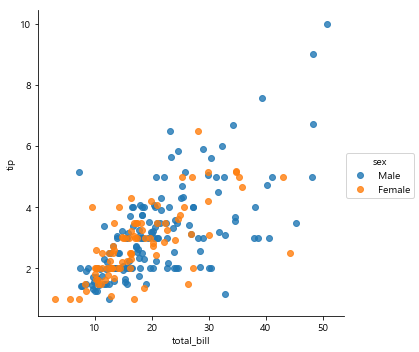

In [107]:
#성별로 전체 식사 대금과 팁의 관계를 확인
sns.lmplot(x="total_bill",y="tip",data=tips,fit_reg=False,hue='sex')  

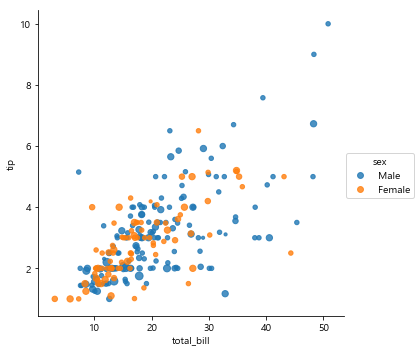

In [110]:
sns.lmplot(x="total_bill",y="tip",data=tips,fit_reg=False,hue='sex',
          scatter_kws={"s":tips["size"]*10})  

## 지도 시각화
    
    - pip install folium

In [111]:
!pip install folium

You are using pip version 18.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
import folium

In [4]:
map= folium.Map(location=[37.720291, 126.719758],zoom_start=17)
map

In [5]:
map= folium.Map(location=[33.310761, 44.360609],zoom_start=15,tiles="Stamen Toner")
map

In [12]:
state_unemp=pd.read_csv("data/folium_US_Unemployment_Oct2012.csv")
state_unemp.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [27]:
state_geo="data/folium_us-states.json"

map=folium.Map(location=[40,-98],zoom_start=4)
map.choropleth(geo_data=state_geo, data=state_unemp ,key_on="feature.id",columns=["State","Unemployment"],fill_color="YlGn")
map

C:\Users\kjjs1\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [19]:
state_geo = "data/folium_us-states.json"

map = folium.Map(location=[40,-98], zoom_start=4) 
map.choropleth(geo_data=state_geo, data=state_unemp, key_on="feature.id", 
               columns=["State", "Unemployment"], fill_color="YlGn")
map

C:\Users\kjjs1\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [52]:
map= folium.Map(location=[37.720291, 126.719758],zoom_start=17)
map

folium.Marker(location=[37.720291, 126.719758], popup='My Home',icon=folium.Icon(color="red",icon="star")).add_to(map)
map

folium.CircleMarker(location=[37.720291, 126.719758],popup="우리집 주변",radias=500,color="#FF0000",fill_color="#FF0000").add_to(map)
map

## WordCloud
    
    pip install wordcloud

In [28]:
from wordcloud import WordCloud, STOPWORDS

(-0.5, 399.5, 199.5, -0.5)

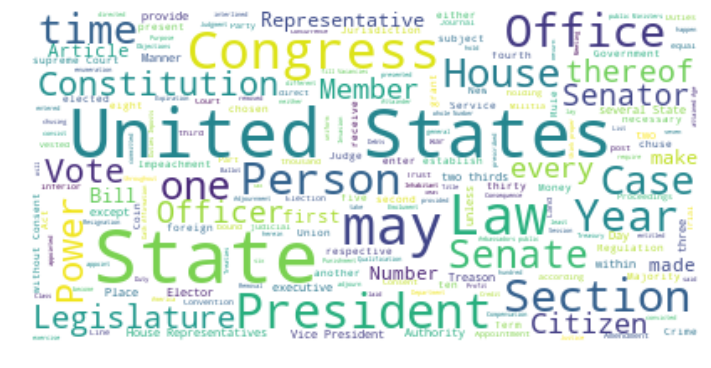

In [18]:
text=open("data/wordcloud/constitution.txt")
text=text.read()

wc=WordCloud(max_font_size=45,background_color='white').generate(text)
wc.words_

plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation="bilinear")   #이미지 복원법 interpolation
plt.axis("off")

(-0.5, 639.5, 479.5, -0.5)

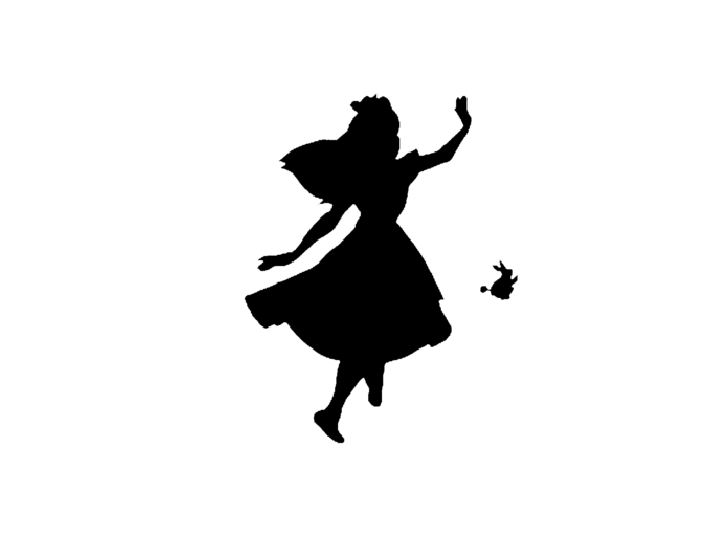

In [26]:
from PIL import Image

alice_mask=np.array(Image.open("data/wordcloud/alice_mask.png"))
alice_mask.shape

plt.figure(figsize=(12,12))
plt.imshow(alice_mask)
plt.axis("off")

(-0.5, 639.5, 479.5, -0.5)

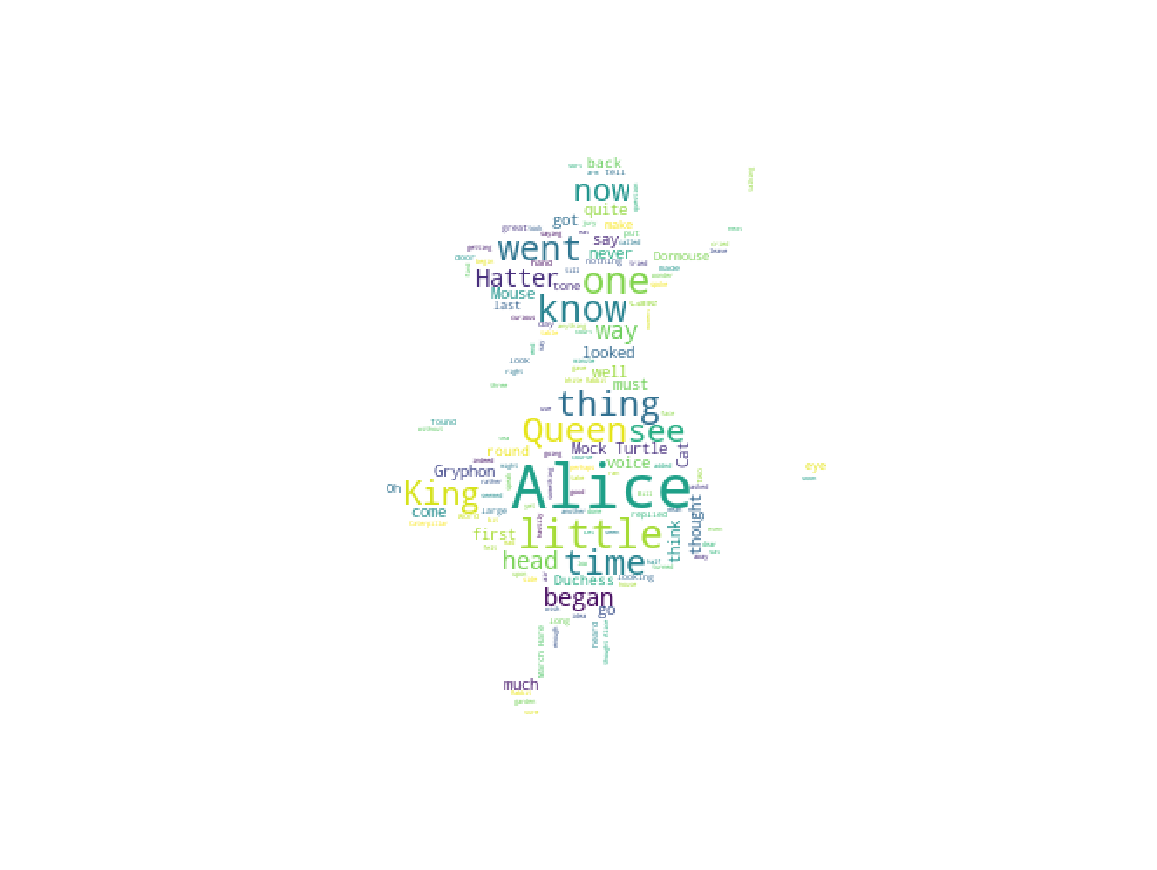

In [39]:
text=open("data/wordcloud/alice.txt").read()
text
stopword = set(STOPWORDS)
stopword.add("said")

wc=WordCloud(mask=alice_mask, stopwords=stopword,background_color="white").generate(text)
wc.words_

plt.figure(figsize=(20,20))
plt.imshow(wc)
plt.axis("off")

In [33]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [42]:
# http:/konlpy.org
!pip install konlpy

  Using cached https://files.pythonhosted.org/packages/85/0e/f385566fec837c0b83f216b2da65db9997b35dd675e107752005b7d392b1/konlpy-0.5.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d7/62/0f312d578e0165e9b5e8fcae0291f7ee83783b3805f59071006b21229d55/JPype1-0.7.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/36/1b/2bd38043d22ade352fc3d3902cf30ce0e2f4bf285be3b304a2782a767aec/tweepy-3.8.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a3/12/b92740d845ab62ea4edf04d2f4164d82532b5a0b03836d4d4e71c6f3d379/requests_oauthlib-1.3.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/05/57/ce2e7a8fa7c0afb54a0581b14a65b56e62b5759dbc98e80627142b8a3704/oauthlib-3.1.0-py2.py3-none-any.whl
  Created wheel for JPype1: filename=JPype1-0.7.1-cp36-cp36m-win_amd64.whl size=1155417 sha256=04889ba347a20484f660fe51d575227e60d9b9312a2e7bbd8cdcd04ecceb5db2
  Stored in directory: C:\Users\kjjs1\AppData\Local\pip\Cache

In [67]:
from konlpy.tag import Okt
from konlpy.corpus import kolaw
import nltk

(-0.5, 399.5, 199.5, -0.5)

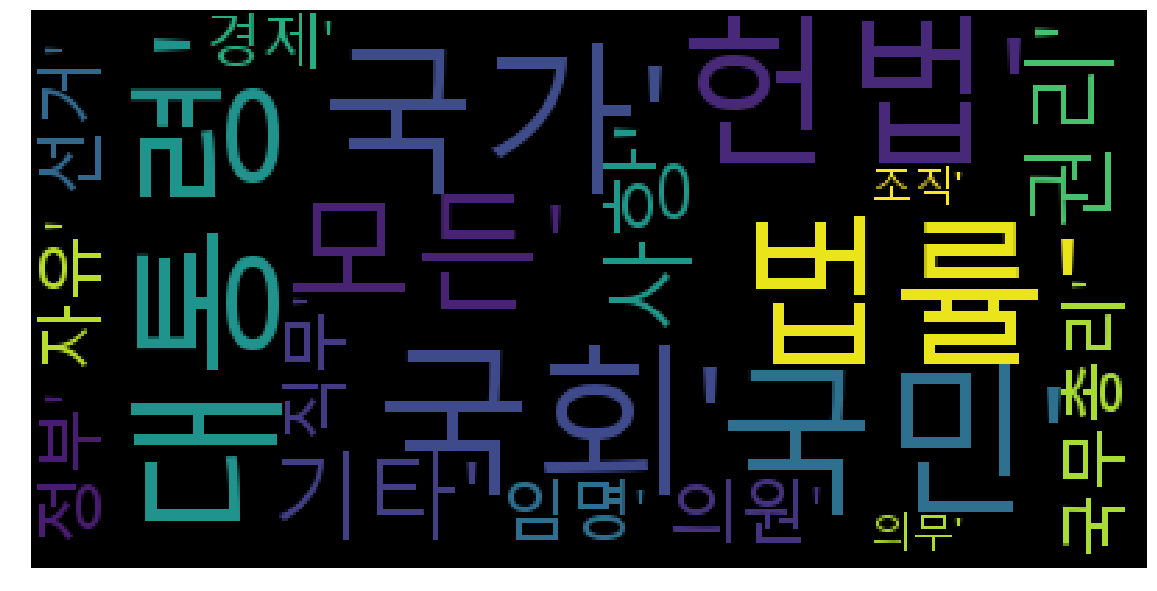

In [82]:
kl_txt=kolaw.open("constitution.txt").read()
kl_txt

stop_words=["제","월","일","조","수","때","그","이","바","및","안","정","위","관","등","외"
            ,"여","자","통","인","회","직","겸","중"]   #필터링할 워드들

t=Okt()
ko_token=t.nouns(kl_txt)                      #형태소분리
kp_token=[word for word in ko_token if word not in stop_words]  # 분리된 단어중 필터링에 걸리지 않는 것들
len(kp_token)

ko = nltk.Text(kp_token)  #단어 빈도수 수집
ko.vocab()

data = ko.vocab().most_common(20)    #가장 자주 나온 단어 갯수


#wc=WordCloud(font_path="C:/WIndows/Fonts/malgun.ttf").generate_from_frequencies(dict(data))  #한글이라 딕트형식으로 넘겨줌
#wc=WordCloud(font_path="C:/WIndows/Fonts/malgun.ttf").generate(dict(data)) # only string 형식의 데이터만 들어간다
plt.figure(figsize=(20,20))
plt.imshow(wc)
plt.axis("off")

In [52]:
t = Okt()
token=t.nouns("아버지가방에들어가신다")
print(token)

['아버지', '가방']
